In [1]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [4]:


columns = [
    "duration", "protocol_type", "service", "flag", "src_bytes", "dst_bytes",
    "land", "wrong_fragment", "urgent", "hot", "num_failed_logins",
    "logged_in", "num_compromised", "root_shell", "su_attempted", "num_root",
    "num_file_creations", "num_shells", "num_access_files", "num_outbound_cmds",
    "is_host_login", "is_guest_login", "count", "srv_count", "serror_rate",
    "srv_serror_rate", "rerror_rate", "srv_rerror_rate", "same_srv_rate",
    "diff_srv_rate", "srv_diff_host_rate", "dst_host_count", "dst_host_srv_count",
    "dst_host_same_srv_rate", "dst_host_diff_srv_rate", "dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate", "dst_host_serror_rate", "dst_host_srv_serror_rate",
    "dst_host_rerror_rate", "dst_host_srv_rerror_rate", "label", "difficulty_level"
]

df_train = pd.read_csv("NSL-KDD/KDDTrain+.txt", header=None, names=columns)
df_test = pd.read_csv("NSL-KDD/KDDTest+.txt", header=None, names=columns)
df_train.head()


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty_level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [20]:
for col in ['protocol_type', 'service', 'flag']:
    le = LabelEncoder()
    df_train[col] = le.fit_transform(df_train[col])
    df_test[col] = le.transform(df_test[col])  # use same encoder

df_train['label'] = df_train['label'].apply(lambda x: 0 if x == 'normal' else 1)
df_test['label'] = df_test['label'].apply(lambda x: 0 if x == 'normal' else 1)

df_train = df_train.drop('difficulty_level', axis=1)
df_test = df_test.drop('difficulty_level', axis=1)

In [19]:
X_train = df_train.drop('label', axis=1)
y_train = df_train['label']
X_test = df_test.drop('label', axis=1)
y_test = df_test['label']

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [27]:
from keras import regularizers
from keras.layers import Input
from keras.callbacks import EarlyStopping
from sklearn.utils import class_weight


model = Sequential()
model.add(Input(shape=(X_train_scaled.shape[1],)))
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.4))
model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
early_stop = EarlyStopping(patience=5, restore_best_weights=True)
weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
weight_dict = {0: weights[0], 1: weights[1]}

history = model.fit(X_train_scaled, y_train, epochs=12, batch_size=128, validation_data=(X_test_scaled, y_test), class_weight=weight_dict, callbacks=[early_stop])


Epoch 1/12
985/985 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9295 - loss: 0.5448 - val_accuracy: 0.8812 - val_loss: 0.3683
Epoch 2/12
985/985 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9878 - loss: 0.0792 - val_accuracy: 0.8628 - val_loss: 0.4208
Epoch 3/12
985/985 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9894 - loss: 0.0659 - val_accuracy: 0.8784 - val_loss: 0.3728
Epoch 4/12
985/985 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9899 - loss: 0.0620 - val_accuracy: 0.8893 - val_loss: 0.3450
Epoch 5/12
985/985 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9908 - loss: 0.0566 - val_accuracy: 0.8764 - val_loss: 0.3821
Epoch 6/12
985/985 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9907 - loss: 0.0544 - val_accuracy: 0.8851 - val_loss: 0.2932
Epoch 7/12
985/985 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9915 - loss: 0.0534 - val_accuracy: 0.8807 - val_loss: 0.3461
Epoch 8/12
985/985 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9915 - loss: 0.0500 - val_accuracy: 0.

In [30]:
y_pred = (model.predict(X_test_scaled) > 0.5).astype('int32')

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

705/705 ━━━━━━━━━━━━━━━━━━━━ 1s 980us/step
Confusion Matrix:
[[ 8975   736]
 [ 1854 10979]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      9711
           1       0.94      0.86      0.89     12833

    accuracy                           0.89     22544
   macro avg       0.88      0.89      0.88     22544
weighted avg       0.89      0.89      0.89     22544



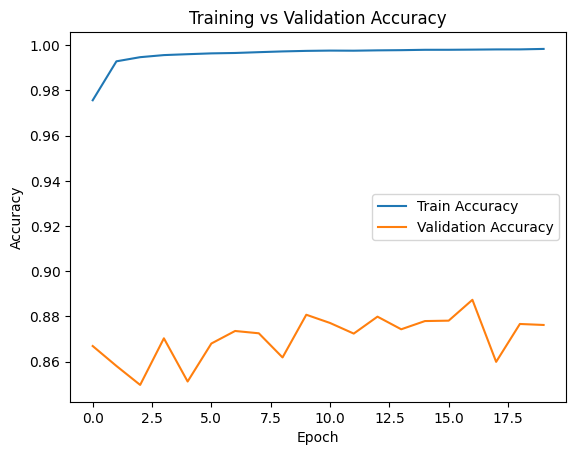

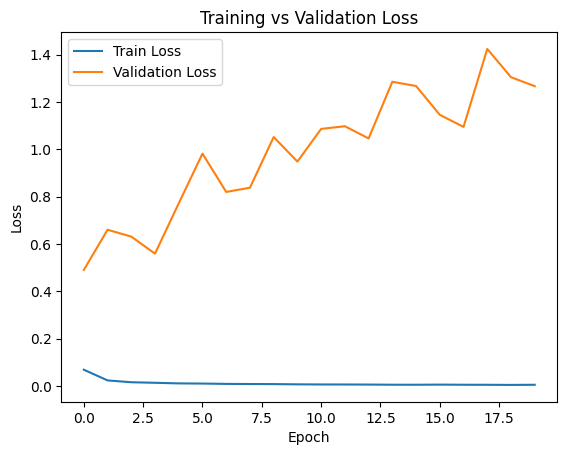

In [23]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()

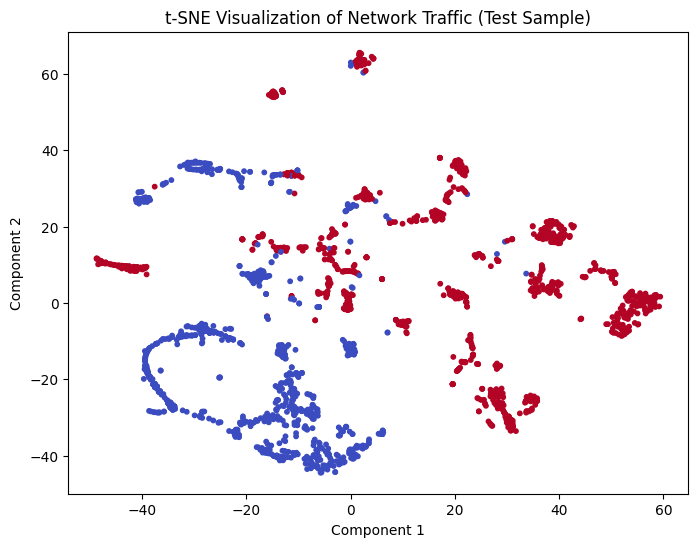

In [24]:
from sklearn.manifold import TSNE

X_sample = X_test_scaled[:2000]
y_sample = y_test[:2000]

tsne = TSNE(n_components=2, random_state=42)
X_embedded = tsne.fit_transform(X_sample)

plt.figure(figsize=(8,6))
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y_sample, cmap='coolwarm', s=10)
plt.title('t-SNE Visualization of Network Traffic (Test Sample)')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()